# **Interpolação**
---
<ul>
  <li><a href="#scrollTo=6T7Gy-Docn5C&uniqifier=1">Interpolação</a>
  </li>
  <ul>
      <li><a href="#scrollTo=E2wcnL1ak8bG&uniqifier=1">Introdução</a></li>
    <li><a href="#scrollTo=pFFXXiPXkxvA&uniqifier=1">Funções comuns</a></li>
    <li><a href="#scrollTo=ytnsyQGrrANe">Método de Lagrange</a></li>
    <li><a href="#scrollTo=I0AnaO4OKRnb">Aplicações: Comparações</a></li>
    <li><a href="#scrollTo=I0AnaO4OKRnb">Aplicações: Splines</a></li>
  </ul>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [ ]:
import time

# Decorator timeit
# Retorna o tempo de excução da função
# Não modifica a função.
# Para mais informações sobre decorators e timeit:
# https://medium.com/pythonhive/python-decorator-to-measure-the-execution-time-of-methods-fa04cb6bb36d
def timeit(method):
    def timed(*args, **kw):
        ts = time.time();
        result = method(*args, **kw);

        te = time.time();

        # Armazenar resultado
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__);
            kw['log_time'][name].append((te - ts) * 1000);
        else:
            print("%r  %2.5f ms" % (method.__name__, (te - ts) * 1000));
        return result
    return timed

In [ ]:
def plot_curve_fit(xi, yi, x, y):
  # Cria quadro
  fig, ax = plt.subplots(1,1, figsize=(15,6));

  # Centralizar eixos
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position('center')

  # Plot time
  ax.plot(xi, yi, 'ro', x, y);

  plt.xlabel('x',fontsize='large') 
  plt.ylabel('y',fontsize='large') 

  plt.show();

# Introdução

A interpolação é um método de próxima $y(x)$ a partir de $n + 1$ pontos na forma $(x_i, y_i)$, para $i = 0, 1, ...,n \space$ e com $x_0 < x_1 < ... < x_n$.

A função estima será um polinomio de grau n, tal que $y_i = P_n(x_i)$ para todo  $0 \leq i \leq n$.

> $P_n(x) = $
>
> $a_0 + a_1*x^1_0 \cdots + a_n*x^n_0 = y_{0}$
>
> $a_0 + a_1*x^1_1 \cdots + a_n*x^n_1 = y_{1}$
>
> $\vdots$ 
>
> $a_0 + a_1*x^1_n \cdots + a_n*x^n_n = y_{n}$

O determinante desse sistema mostra que P é único se e somente se $det(A) \neq 0$.

> A = 
>
> $1 + x^1_1 \cdots + x^n_1$
>
> $1 + x^1_2 \cdots + x^n_2$
>
> $\vdots$ 
>
> $1 + x^1_n \cdots + x^n_n$

Essa é a matriz de Vandermonde e seu determinante pode ser calculado como:

$\det(A)=\prod _{1\leq i<j\leq n}(x_{j}-x_{i}) \neq 0$

Portanto, como $x_i \neq x_j$ P é único. 

In [ ]:
# Interpola o vetor x e y. Retorna o polinomio com o maior grau a esquerda. 
@timeit
def interpolacao_linear(x, y, **kwards):
  n = np.shape(x)[0];
  vander = np.vander(x, n);
  return np.linalg.solve(vander, y);

'interpolacao_linear'  0.61107 ms


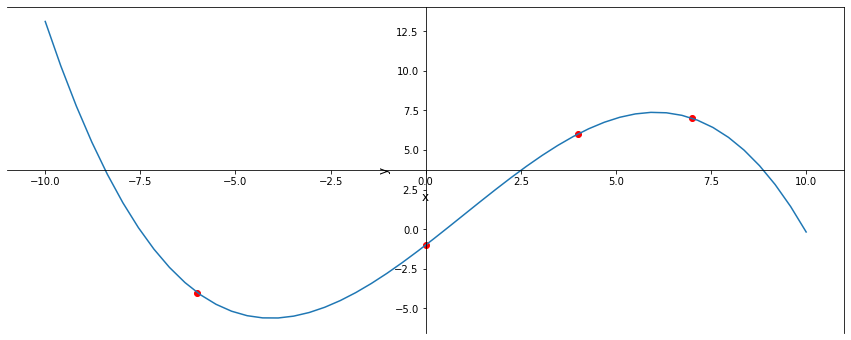

In [ ]:
# Pontos
xi = np.array([-6, 0, 4, 7]);
yi = np.array([-4, -1, 6, 7]);

# Polinomio
p = interpolacao_linear(xi, yi);

# Intervalo
t = np.linspace(-10, 10);
pt = np.polyval(p, t);

# Gráfico
plot_curve_fit(xi, yi, t, pt);

## Interpolação com Lagrange

A interpolação també pode ser obtida a partir da fórmula de Lagrange.

$P_n(x) = \sum_{i=0}^n y_i * l_i(x)$

Em que $l_i$ é:

$l_i = \prod_{j=0, i \neq j}^n (x - x_j) / (x_i - x_j)$

$ \space \\
$

O significado de $l_i$ é:

$L_i(x_j)=\left\{\begin{matrix}
  0 & se & i \neq j \\
  1 & se & i = j \\ 
\end{matrix}\right.$
$ \space \\
$

Podemos visualizar isso melhor com o seguinte exemplo:

Se $l_i(x_i)$, então $i = j$. Como no produtório o termo j salta quando é igual a i, então temos o seguinte produto (n = 2):
$ \space \\
$

$l_0(x_0) = (x_0 - x_1)(x_0 - x_2) / (x_0 - x_1)(x_0 - x_2) = 1$

$l_0(x_1) = (x_1 - x_1)(x_1 - x_2) / (x_0 - x_1)(x_0 - x_2) = 0\\
$

Assim, $P_n(x_i) = y_i$.

In [ ]:
@timeit
def interpolacao_lagrange(xi, yi, x, **kwards):
    n = np.size(xi);
    m = np.size(x); 
    
    L = np.ones((n,m));

    for i in np.arange(n):
        for j in np.arange(n):
            if(i != j):
                L[i,:] = (L[i,:]*(x-xi[j]))/(xi[i]-xi[j]);

    y = np.dot(yi, L);
    return y;

'interpolacao_lagrange'  0.30947 ms


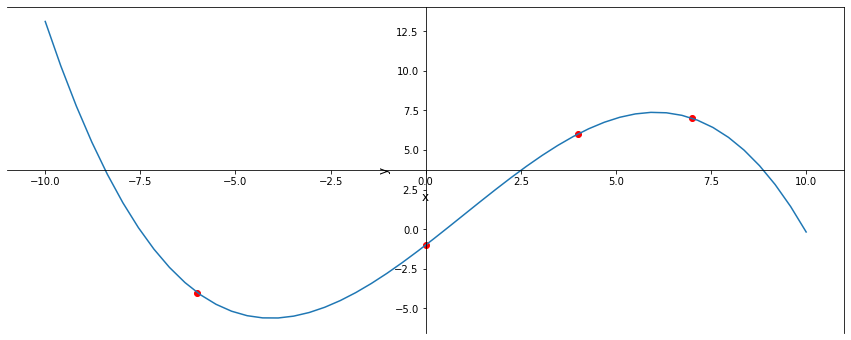

In [ ]:
# Pontos
xi = np.array([-6, 0, 4, 7]);
yi = np.array([-4, -1, 6, 7]);

# Intervalo
x = np.linspace(-10, 10);

# Polinomio
y = interpolacao_lagrange(xi, yi, t);

# Gráfico
plot_curve_fit(xi, yi, x, y);

In [ ]:
from scipy.interpolate import lagrange

@timeit
def lagrande_method(x, y, **kwards):
  return lagrange(x, y);

In [ ]:
def compare_methods():
  # Tempo gerado por execução
  logtime_data = {
     "interpolacao_linear": [],
     "interpolacao_lagrange" : [],
     "lagrande_method": []
  }

  # Intervalo
  x_sample = []
  for i in range(50, 5000):
    x_sample.append(i);
    x = np.linspace(-i, i, 100);
    y = np.random.randint(-i, i, 100);
    t = np.linspace(-i, i, 200);

    interpolacao_lagrange(x, y, t, log_time= logtime_data);
    # interpolacao_linear(x, y, log_time= logtime_data);
    lagrande_method(x, y, log_time= logtime_data);

  # Quadro do plot  
  fig = plt.figure(figsize=(12,6));
  ax = fig.add_subplot(111);
  
  # Plot time
  # ax.plot(x_sample, logtime_data.get("interpolacao_linear"), 'b', label= "interpolacao_linear" + " time",  linewidth=3.5);
  ax.plot(x_sample, logtime_data.get("interpolacao_lagrange"), 'y', label= "interpolacao_lagrange" + " time",  linewidth=3.5);
  ax.plot(x_sample, logtime_data.get("lagrande_method"), 'r', label= "lagrande_method" + " time",  linewidth=3.5);

  # Legendas
  ax.set(title="Tempo(s) de execução em função do range", xlabel="Tamanho n", ylabel="Tempo(s)");
  ax.legend(loc="best", fontsize='large');
  
  plt.show();

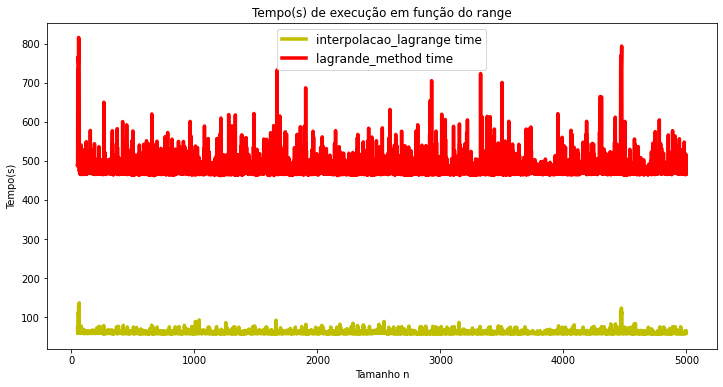

In [176]:
compare_methods();

## Splines
